In [1]:
import robot_header

In [2]:
import robot
bot = robot.Robot()

- connexion aux moteurs ... ok
- connexion à la caméra ... [ok]
- initialisation procédure de test globale
  - check moteurs:
    [avant gauche] 	temp: 45.0° 	volt: 10.40V  	[ok]
    [arrière gauche] 	temp: 46.0° 	volt: 10.10V  	[ok]
    [avant droit] 	temp: 44.0° 	volt: 10.10V  	[ok]
    [arrière droit] 	temp: 44.0° 	volt: 10.10V  	[ok]
  - check capteurs:
    [dist. avant] ... [ok]
    [camera] ... [ok]
- procédure de test globale ... [ok]


- Enregistrement de l'image dans image.jpg


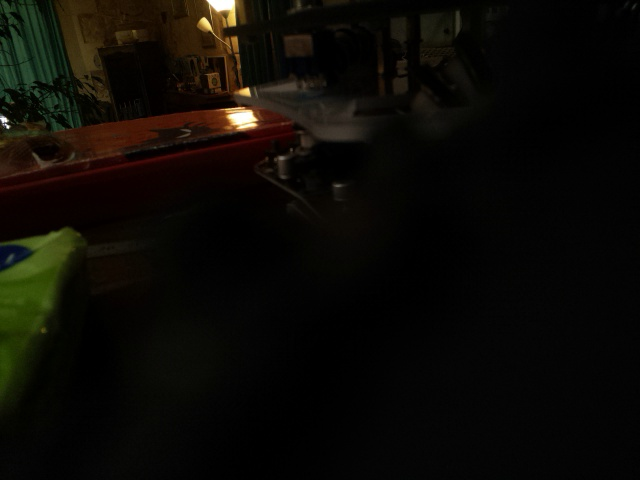

In [8]:
bot.photo()
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "image.jpg")